# Рабочая тетрадь 3

## Петренко Егор, ББСО-01-21

### 1.3.1 Задание

Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
расстояния по описанным в примере выше метрикам. Отобразите точки
в трехмерном пространстве.


x-y
5.196152422706632
27.0
5.0
7.0
x-z
7.54983443527075
57.0
7.0
11.0
x-w
6.708203932499369
45.00000000000001
6.0
9.0
y-z
2.449489742783178
5.999999999999999
2.0
4.0
y-w
5.477225575051661
30.0
5.0
8.0
z-w
6.0
36.0
4.0
10.0


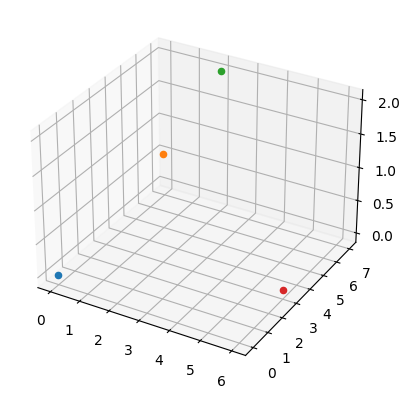

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")

x = np.array([0,0,0])
y = np.array([1,5,1])
z = np.array([2,7,2])
w = np.array([6,3,0])
ax.scatter(x[0], x[1], x[2])
ax.scatter(y[0], y[1], y[2])
ax.scatter(z[0], z[1], z[2])
ax.scatter(w[0], w[1], w[2])

print("x-y")
print(np.linalg.norm(x-y))
print(np.linalg.norm(x-y)**2)
print(np.linalg.norm(x-y, ord=np.inf))
print(np.linalg.norm(x-y, ord=1))

print("x-z")
print(np.linalg.norm(x-z))
print(np.linalg.norm(x-z)**2)
print(np.linalg.norm(x-z, ord=np.inf))
print(np.linalg.norm(x-z, ord=1))

print("x-w")
print(np.linalg.norm(x-w))
print(np.linalg.norm(x-w)**2)
print(np.linalg.norm(x-w, ord=np.inf))
print(np.linalg.norm(x-w, ord=1))

print("y-z")
print(np.linalg.norm(y-z))
print(np.linalg.norm(y-z)**2)
print(np.linalg.norm(y-z, ord=np.inf))
print(np.linalg.norm(y-z, ord=1))

print("y-w")
print(np.linalg.norm(y-w))
print(np.linalg.norm(y-w)**2)
print(np.linalg.norm(y-w, ord=np.inf))
print(np.linalg.norm(y-w, ord=1))

print("z-w")
print(np.linalg.norm(z-w))
print(np.linalg.norm(z-w)**2)
print(np.linalg.norm(z-w, ord=np.inf))
print(np.linalg.norm(z-w, ord=1))

plt.show()

### 2.3.1 Задание

Для предыдущего примера поэкспериментируйте с параметрами
классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте
результаты.

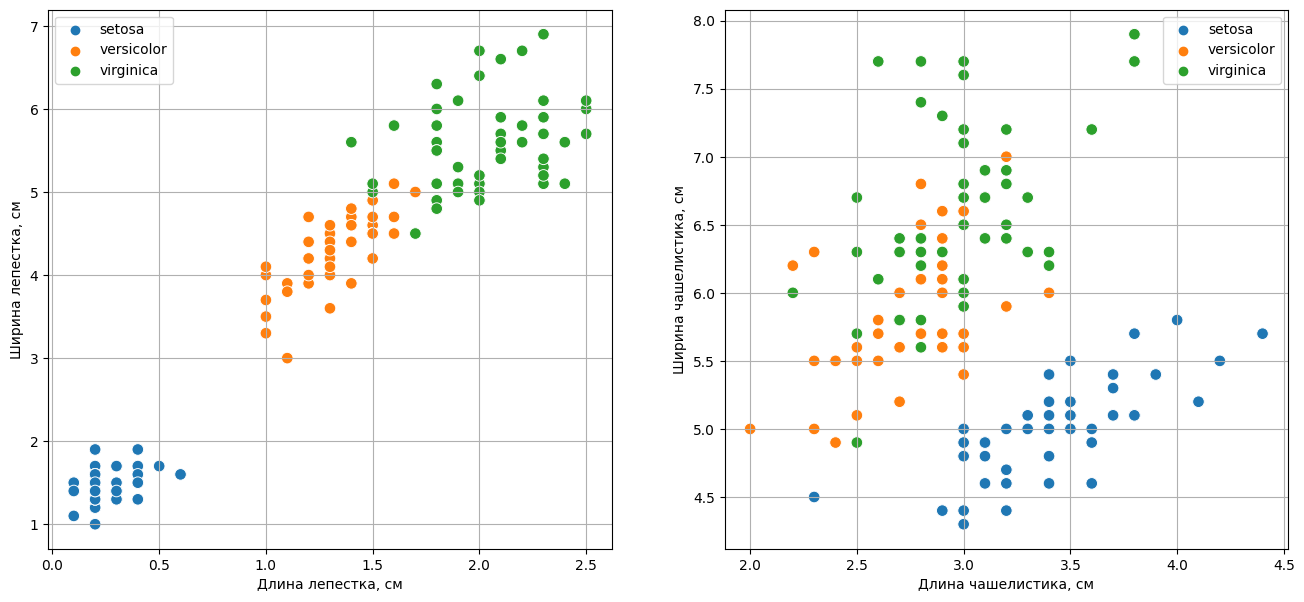

In [3]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

iris = sns.load_dataset('iris')

plt.figure(figsize=(16,7))

plt.subplot(121)
sns.scatterplot(data=iris, x='petal_width', y='petal_length', hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend()
plt.grid()

plt.subplot(122)
sns.scatterplot(data=iris, x='sepal_width', y='sepal_length', hue='species', s=70)
plt.xlabel('Длина чашелистика, см')
plt.ylabel('Ширина чашелистика, см')
plt.legend()
plt.grid()

(127, 4) (23, 4) (127,) (23,)
     sepal_length  sepal_width  petal_length  petal_width
7             5.0          3.4           1.5          0.2
110           6.5          3.2           5.1          2.0
32            5.2          4.1           1.5          0.1
112           6.8          3.0           5.5          2.1
78            6.0          2.9           4.5          1.5
7          setosa
110     virginica
32         setosa
112     virginica
78     versicolor
Name: species, dtype: object
KNeighborsClassifier(n_neighbors=10)
['virginica' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'setosa' 'setosa' 'virginica' 'setosa' 'setosa' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'setosa' 'setosa'
 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']
accuracy: 0.957


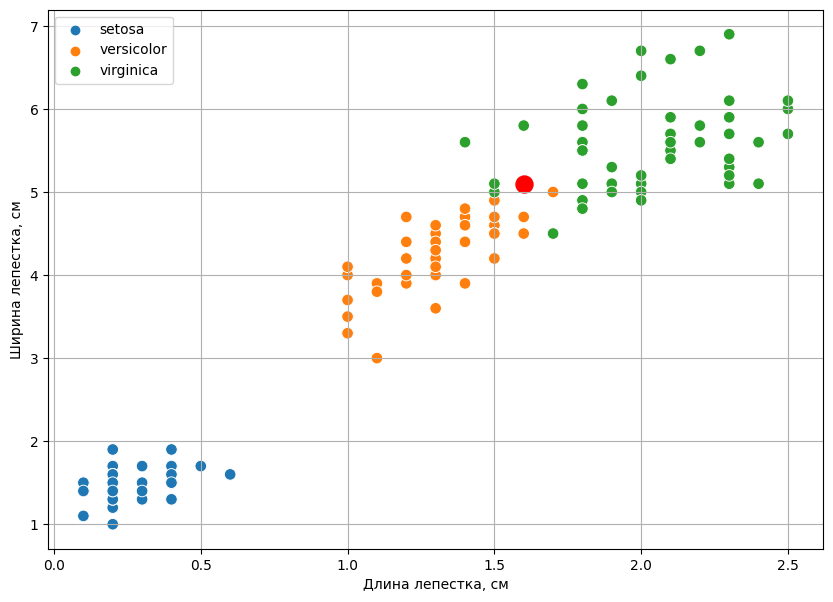

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], iris.iloc[:, -1], test_size=0.15)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print(x_train.head())
print(y_train.head())

model = KNeighborsClassifier(n_neighbors = 10)
print(model.fit(x_train, y_train))

y_pred = model.predict(x_test)
print(y_pred)

plt.figure(figsize=(10,7))
sns.scatterplot(data=iris, x='petal_width', y='petal_length', hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(x_test.iloc[i, 3], x_test.iloc[i, 2], color='red', s=150)

print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

### 3.3.2 Задание

Определите набор признаков человека, по аналогии из РТ 1, – например,
цвет глаз и конвертируйте его в матрицу признаков.


In [2]:
from sklearn.feature_extraction import DictVectorizer

data_dict = [{"Рост":160, "Вес": 45,"Возраст":19 ,"Цвет глаз": "карий"},
             {"Рост":190, "Вес": 75,"Возраст":18 ,"Цвет глаз": "зеленый"},
             {"Рост":180, "Вес": 65,"Возраст":18 ,"Цвет глаз": "голубой"}]

features = DictVectorizer(sparse=False).fit_transform(data_dict)
features

array([[ 45.,  19., 160.,   0.,   0.,   1.],
       [ 75.,  18., 190.,   0.,   1.,   0.],
       [ 65.,  18., 180.,   1.,   0.,   0.]])